In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('dataset/pima-indians-diabetes.csv') 

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
import tensorflow as tf

In [9]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [12]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [13]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

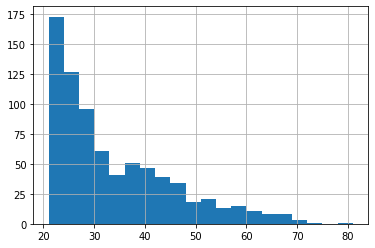

In [17]:
diabetes['Age'].hist(bins=20)

In [18]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [19]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [ ]:
# TRAIN TEST DATA

In [20]:
x_data = diabetes.drop('Class',axis=1)

In [23]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [24]:
labels = diabetes['Class']

In [27]:
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [28]:
#from sklearn.model_selection import train_test_split

In [29]:
#x_train,x_test,y_train,y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [31]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [33]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmphy0lcowo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a463e1a10>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [36]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmphy0lcowo/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2000 into /var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmphy0lcowo/model.ckpt.
INFO:tensorflow:loss = 6.170356, step = 2001
INFO:tensorflow:global_step/sec: 75.4362
INFO:tensorflow:loss = 5.128986, step = 2101 (1.327 sec)
INFO:tensorflow:global_step/sec: 197.427
INFO:tensorflow:loss = 5.2684073, step = 2201 (0.507 sec)
INFO:tensorflow:global_step/sec: 231.941
INFO:tensorflow:loss = 5.146695, step = 2301 (0.431 sec)
INFO:tensorflow:global_step/sec: 218.074
INFO:tensorflow:loss = 4.9599466, step = 2401 (0.458 sec)
INFO:tensorflow:global_step/sec: 214.643
INFO:tensorflow:loss = 3.1578789, step = 2

In [37]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [39]:
result = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-14T01:56:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmphy0lcowo/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-08-14-01:56:48
INFO:tensorflow:Saving dict for global step 3000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.82316875, auc_precision_recall = 0.67984515, average_loss = 0.50263625, global_step = 3000, label/mean = 0.35064936, loss = 4.837874, precision = 0.64, prediction/mean = 0.37821513, recall = 0.5925926
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3000: /var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmphy0lcowo/model.ckpt-3000


In [41]:
result

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82316875,
 'auc_precision_recall': 0.67984515,
 'average_loss': 0.50263625,
 'label/mean': 0.35064936,
 'loss': 4.837874,
 'precision': 0.64,
 'prediction/mean': 0.37821513,
 'recall': 0.5925926,
 'global_step': 3000}

In [52]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,batch_size=10,num_epochs=1,shuffle=False)

In [53]:
predictions = model.predict(pred_input_func)

In [54]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmphy0lcowo/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [55]:
my_pred

[{'logits': array([0.1343975], dtype=float32),
  'logistic': array([0.5335489], dtype=float32),
  'probabilities': array([0.4664511, 0.5335489], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.9444932], dtype=float32),
  'logistic': array([0.72000635], dtype=float32),
  'probabilities': array([0.27999362, 0.72000635], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.74664015], dtype=float32),
  'logistic': array([0.32155383], dtype=float32),
  'probabilities': array([0.6784462 , 0.32155383], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.5394105], dtype=float32),
  'logistic': array([0.36832476], dtype=float32),
  'probabilities': array([0.63167524, 0.36832473], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.9436963], dtype=float32),
  'logistic': ar

In [56]:
# Dense Neural Network classifier